In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.stem import PorterStemmer

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
df=pd.read_csv("C:\\Users\\M lapan\\Downloads\\gdsc-ml-workshop-final-project\\train.csv")

In [4]:
df.head()

,ID,title,text,subject,date,class
0,0.0,#AfterTrumpImplodes Hashtag Hilariously Imagi...,What will the world be like post-Donald Trump?...,News,5-Aug-16,0.0
1,1.0,#BlackLivesMatter Leader To Run For Mayor Of ...,The police shooting of black teen Michael Brow...,News,4-Feb-16,0.0
2,2.0,#BringBackObama Hashtag Blows Up On Twitter A...,The six months since President Donald Trump wa...,News,13-Jul-17,0.0
3,3.0,#FreeChrisChristie: Twitter Reacts To The ‘Ho...,"Last Friday, New Jersey Governor Chris Christi...",News,2-Mar-16,0.0
4,4.0,#MakeAmericaBrannigan: Futurama Voice Actor R...,"The incredibly talented voice actor, Billy Wes...",News,13-Aug-16,0.0


In [5]:
df.shape

(44919, 6)

In [6]:
df.isnull().sum()

ID         4513
title      4492
text       4492
subject    4505
date       4505
class      4505
dtype: int64

In [7]:
df.dropna(inplace=True,how='any')

In [8]:
df.isnull().sum()

ID         0
title      0
text       0
subject    0
date       0
class      0
dtype: int64

In [9]:
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to C:\Users\M
[nltk_data]     lapan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
df['content'] = df['title']+' '+df['text']

In [11]:
def clean_data(x):
    x = x.lower()
    x = re.sub(r'\S*@\S*\s?', '', x)
    x = re.sub(r'<.*?>', '', x)
    x = re.sub(r'http\S+', '', x)
    x = re.sub(r"[^a-zA-Z\s']", '', x)
    x = re.sub(r"\b([a-zA-Z]+)\'s\b", r"\1 is", x)
    return x

In [12]:
df['content'] = df['content'].apply(clean_data)

In [13]:
X = df.drop(columns='class', axis=1)
Y = df['class']

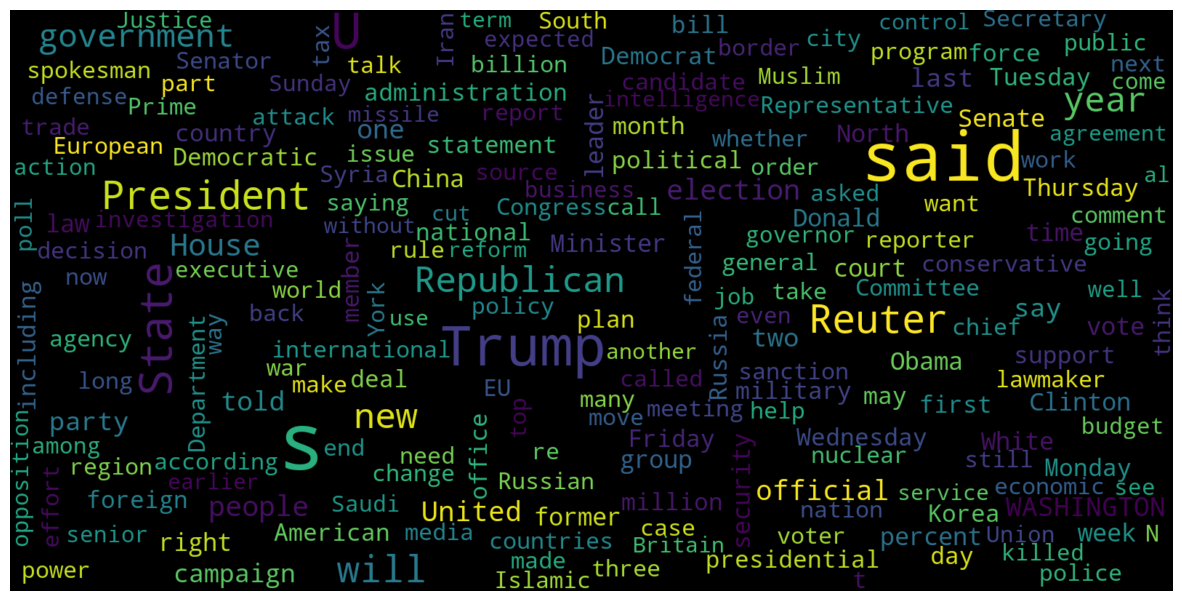

In [13]:
consolidated = ' '.join( 
    word for word in df['content'][df['class'] == 1].astype(str)) 
wordCloud = WordCloud(width=1600, 
                      height=800, 
                      random_state=21, 
                      max_font_size=110, 
                      collocations=False) 
plt.figure(figsize=(15, 10)) 
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear') 
plt.axis('off') 
plt.show()

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
vectoriser = CountVectorizer()

In [15]:
preprocessed_text = df.content
X_tr = vectoriser.fit_transform(preprocessed_text)

In [16]:
print(X_tr.shape)

(40393, 193160)


In [17]:
vectoriser = CountVectorizer(min_df = 300, 
                            max_df = 0.40, 
                            stop_words = 'english',
                            max_features = 10000)
X_tr= vectoriser.fit_transform(preprocessed_text)

In [18]:
print(X_tr.shape)

(40393, 3706)


In [19]:
print(X_tr[0:100,0:100])

  (0, 5)	1
  (1, 88)	1
  (1, 77)	1
  (1, 40)	2
  (1, 99)	1
  (1, 21)	1
  (2, 92)	1
  (2, 33)	1
  (2, 90)	1
  (2, 14)	1
  (2, 60)	1
  (4, 44)	2
  (5, 33)	1
  (6, 5)	1
  (6, 48)	2
  (6, 86)	1
  (6, 31)	1
  (7, 5)	1
  (7, 94)	1
  (7, 19)	1
  (8, 27)	2
  (8, 51)	1
  (10, 3)	1
  (11, 48)	1
  (11, 18)	2
  :	:
  (89, 47)	1
  (90, 48)	1
  (90, 9)	2
  (90, 26)	1
  (91, 48)	2
  (91, 41)	1
  (92, 48)	1
  (92, 19)	1
  (92, 39)	2
  (93, 9)	1
  (93, 52)	1
  (94, 18)	1
  (94, 89)	4
  (94, 63)	1
  (95, 48)	1
  (95, 16)	1
  (96, 33)	1
  (96, 31)	1
  (96, 52)	1
  (96, 87)	1
  (97, 50)	1
  (98, 52)	1
  (99, 5)	1
  (99, 48)	1
  (99, 67)	2


In [20]:
test =pd.read_csv("C:\\Users\\M lapan\\Downloads\\gdsc-ml-workshop-final-project\\test.csv")

In [21]:
test.head()

,ID,title,text,subject,date
0,1,U.S. judge presses Trump administration on Dre...,NEW YORK (Reuters) - A U.S. judge on Thursday ...,politicsNews,21-Sep-17
1,2,U.S. judge questions government on Trump's lat...,"GREENBELT, Md. (Reuters) - A U.S. judge on Mon...",politicsNews,16-Oct-17
2,3,U.S. judge questions states seeking to restore...,SAN FRANCISCO (Reuters) - A U.S. judge on Mond...,politicsNews,23-Oct-17
3,4,U.S. judge refuses to halt New York nuclear po...,NEW YORK (Reuters) - A federal judge on Tuesda...,politicsNews,25-Jul-17
4,5,U.S. judge rejects bid to dismiss Indonesian i...,BOSTON (Reuters) - A federal judge on Wednesda...,worldnews,25-Oct-17


In [22]:
test['content'] = test['title']+' '+test['text']

In [23]:
test.shape

(4496, 6)

In [24]:
preprocessed_text = test.content

X = vectoriser.fit_transform(preprocessed_text)

In [25]:
vectoriser = CountVectorizer(min_df = 100,
                            max_df = 0.90,
                            stop_words = 'english',
                            max_features = 10000)

X = vectoriser.fit_transform(preprocessed_text)

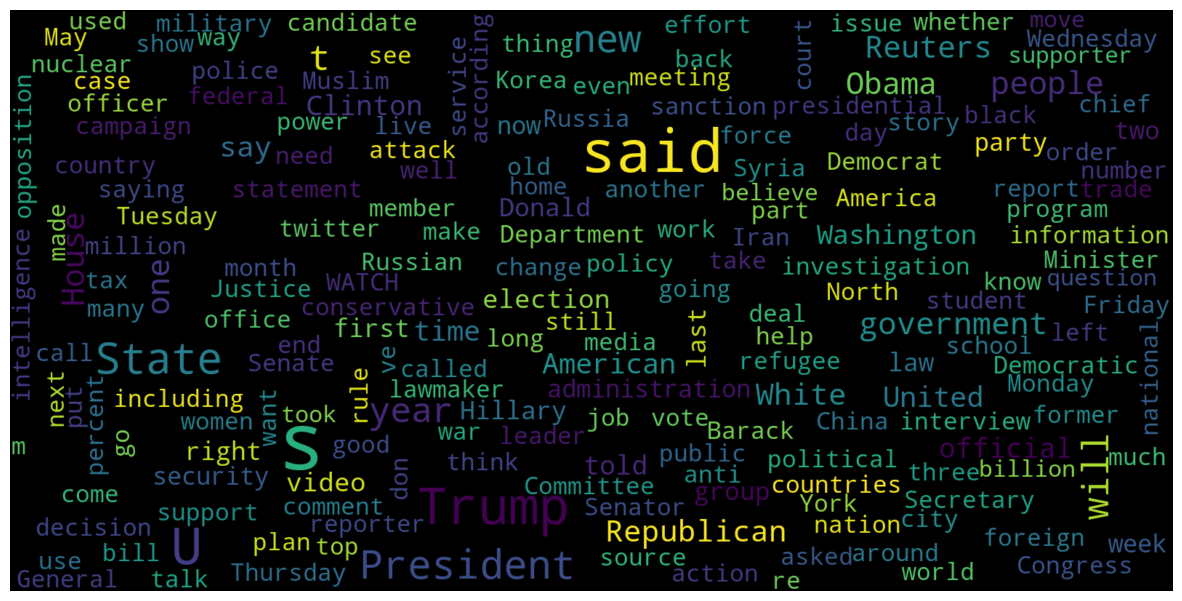

In [28]:
consolidated = ' '.join(
    word for word in test['content'].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

In [26]:
X.shape

(4496, 1380)

In [27]:
percent =X.shape[1]/X_tr.shape[1]

In [28]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2

# Assuming X_tr and Y are defined
FeatureSelection = SelectPercentile(score_func=chi2, percentile=(percent*100))
X_NEW = FeatureSelection.fit_transform(X_tr, Y)


In [29]:
X_NEW.shape

(40393, 1380)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_NEW, Y, test_size=0.2, random_state=42)

In [31]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [32]:
y_pred = model.predict(X_test)

In [33]:
print(y_pred)

[1 1 0 ... 1 0 0]


In [34]:
print('Accuracy score of Logistic Regression Model: ', accuracy_score(y_test, y_pred))

Accuracy score of Logistic Regression Model:  0.9819284564921401


In [35]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [36]:
y_pred_tree = model2.predict(X_test)
y_pred_tree

array([1, 1, 0, ..., 1, 0, 0])

In [37]:
print('Accuracy score of Decision Tree Classifier: ', accuracy_score(y_test, y_pred_tree))

Accuracy score of Decision Tree Classifier:  0.9535833642777571


In [41]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier()
model3.fit(X_train,y_train)

RandomForestClassifier()

In [42]:
y_pred_randomForest=model3.predict(X_test)

In [43]:
y_pred_randomForest

array([1, 1, 0, ..., 1, 0, 0])

In [45]:
print('Accuracy score of Random Forest Classifier: ', accuracy_score(y_test, y_pred_randomForest))

Accuracy score of Random Forest Classifier:  0.9831662334447333


In [49]:
y_test_pred = model3.predict(X)

In [50]:
y_test_pred

array([1, 1, 1, ..., 1, 1, 1])

In [51]:
output = pd.DataFrame({'ID': test.ID, 'class': y_test_pred})
output.to_csv('submission.csv', index=False)